<a href="https://colab.research.google.com/github/EltonGino/Page-View-Time-Series-Visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib pandas seaborn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/fcc-forum-pageviews.csv')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
# converter a coluna date para datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
# Setar a coluna date como index
df.set_index('date', inplace=True)

In [8]:
# Remover 2.5% do Top e Bottom da Data
df = df[(df['value'] >= df ['value'].quantile(0.025)) & (df['value'] <= df['value']. quantile(0.975))]

In [9]:
df.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


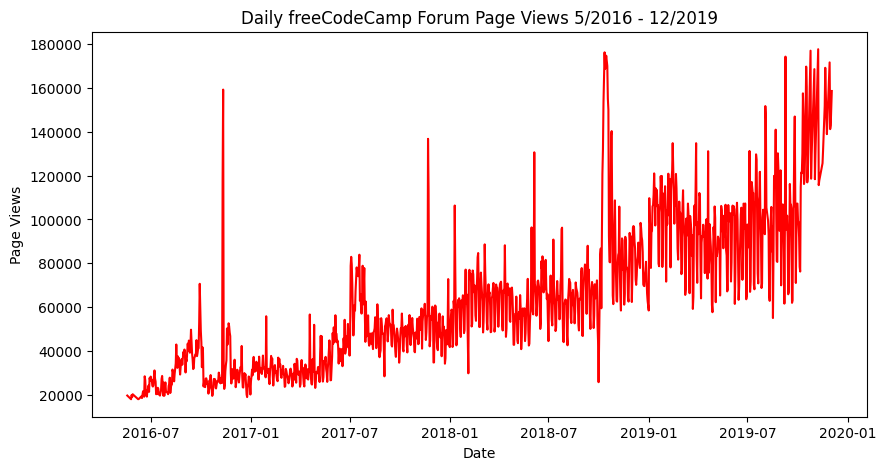

In [11]:
# Grafico de linha
plt.figure(figsize =(10, 5))
plt.plot(df.index, df['value'], color = 'red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

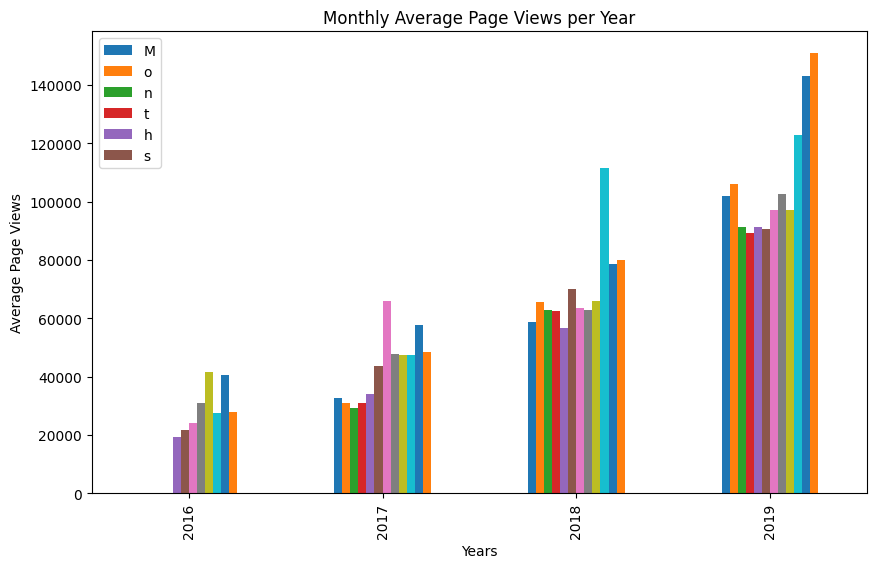

In [13]:
# Copiar o dataframe
df_bar = df.copy()

# Add as colunas para ano e mes
df_bar['year'] = df_bar.index.year
df_bar['month'] = df_bar.index.month

# Agrupar por ano e mes e fazer o calculo
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

# plotar o grafico de barras
df_bar.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average Page Views per Year')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend('Months')
plt.show()

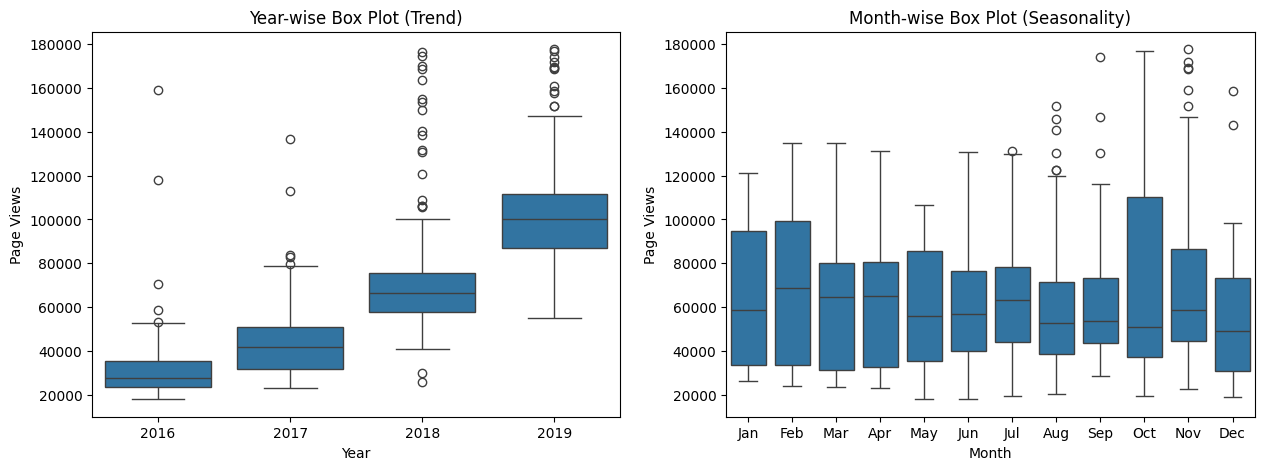

In [17]:
# Preparando o data para o box plot
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')

# Distribuir os meses na ordem correta
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories = months, ordered = True)

# Criar o grafico de box plot
fig, axes= plt.subplots(1, 2, figsize=(15, 5))

# Box Plot com Ano
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

# Box Plot com Mes
sns.boxplot(x='month', y='value', data=df_box, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

plt.show()